In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


# Construct the relative file path
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'quadcopterFeasability.csv')
olddata = pd.read_csv(file_path)
# Construct the relative file path
filePath = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
data = pd.read_csv(filePath)
data = data.dropna()  # Add this line to remove rows with NaN values

# Construct the relative file path
filePath = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')
coverData = pd.read_csv(filePath)


# Define a mapping from unique entries to values
mapping = {
    65: 1,
    '65': 1,
    10: 2,
    '10': 2,
    0: 3,
    '0': 3,
    200: 4,
    '200': 4,
    'gimbal': 5
}

# Assign categorical values based on the mapping
data['Overlap_cat'] = data['Overlap'].map(mapping)



View data

In [82]:
print(data)

     subplots  Mean_estimated_Density  mean_N  trueDensity  \
0        16.0                 179.777     8.0      125.000   
1        16.0                 314.393    17.0      265.625   
2        16.0                 374.818    21.0      328.125   
3        16.0                 438.617    25.0      390.625   
4        16.0                  85.150     3.0       46.875   
..        ...                     ...     ...          ...   
195       9.0                 609.269    17.0      555.556   
196       9.0                 721.357    20.0      666.667   
197       9.0                 736.375    20.0      666.667   
198       9.0                 848.814    24.0      805.556   
199       9.0                1087.130    32.0     1055.556   

     Mean_relative_Estimate  Percent_Bias  RRMSE  CI_Coverage_Prob  Mean_SE  \
0                     1.438        43.822  1.255             0.987    4.258   
1                     1.184        18.360  0.363             0.994    1.118   
2                 

In [83]:
print(data.sort_values('CV'))

     subplots  Mean_estimated_Density  mean_N  trueDensity  \
139      25.0                 898.457   254.0      900.000   
138      25.0                 798.779   226.0      800.000   
137      25.0                 700.157   198.0      700.000   
128      16.0                 938.860   170.0      937.500   
129      16.0                 985.476   178.0      984.375   
..        ...                     ...     ...          ...   
190       9.0                 241.115     4.0      138.889   
60        4.0                 259.735     2.0      125.000   
20        4.0                 349.750     3.0      187.500   
164      16.0                  92.971     3.0       46.875   
180       4.0                 346.133     2.0      125.000   

     Mean_relative_Estimate  Percent_Bias  RRMSE  CI_Coverage_Prob   Mean_SE  \
139                   0.998        -0.171  0.015             1.000     0.069   
138                   0.998        -0.153  0.016             1.000     0.074   
137            

/tmp/ipykernel_539/686132215.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_539/686132215.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_539/686132215.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_539/686132215.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_5

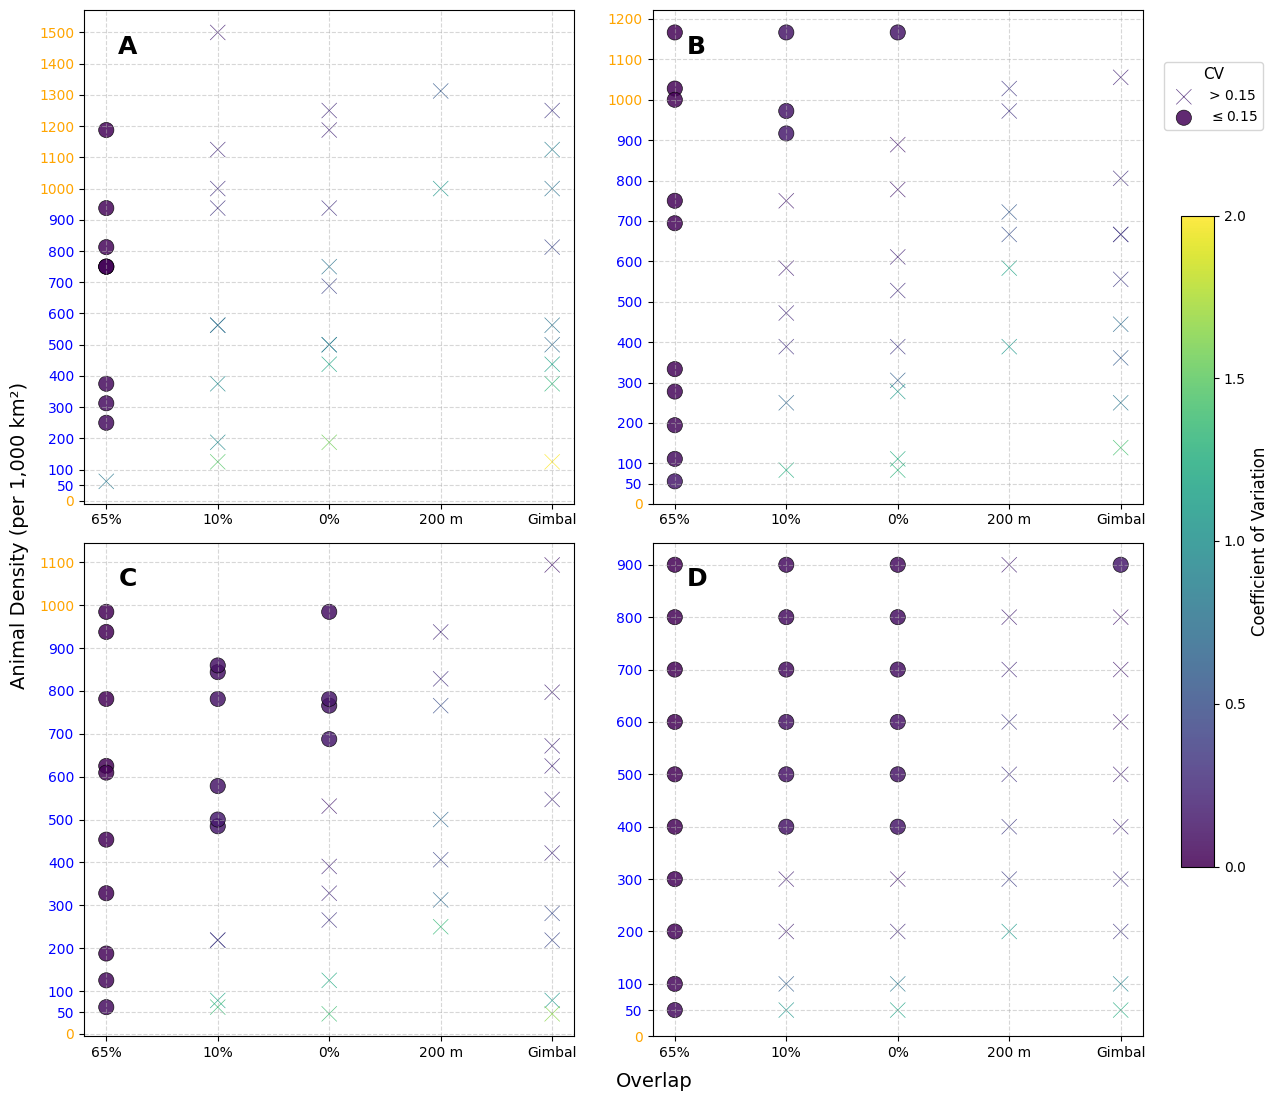

In [21]:
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # Use first 4 for 2x2 layout

label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

cmap = plt.get_cmap('viridis')
# norm = mpl.colors.LogNorm(vmin=sorted_data['CV'].min()+1e-6, vmax=sorted_data['CV'].max())
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['CV'].max(),0)  # Use absolute maximum
    # vmax=175
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('CV')

    mask_x = subset['CV'] > 0.15
    mask_circle = subset['CV'] <= 0.15

    sc_x = ax.scatter(
        subset.loc[mask_x, 'Overlap_cat'],
        subset.loc[mask_x, 'trueDensity'],
        c=subset.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        subset.loc[mask_circle, 'Overlap_cat'],
        subset.loc[mask_circle, 'trueDensity'],
        c=subset.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Ensure all blue ticks are visible
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(int(0), int(y_max)+1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label (A, B, C, D)
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Shared colorbar
max_val = round(sorted_data['CV'].max(),0)
cbar_ticks = np.linspace(0, max_val, 5)  # Create 6 evenly spaced ticks from 0 to max
# cbar_ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]
cbar = fig.colorbar(sc_circle, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Coefficient of Variation', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Legend
fig.legend(['> 0.15', r'$\leq 0.15$'], title='CV',
           loc='upper right', bbox_to_anchor=(0.94, 0.9),
           fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_CV_combined.png'), dpi=300)
plt.show()


In [14]:
round(sorted_data['Percent_Bias'].max(),-1)

np.float64(180.0)

/tmp/ipykernel_539/3120197348.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])


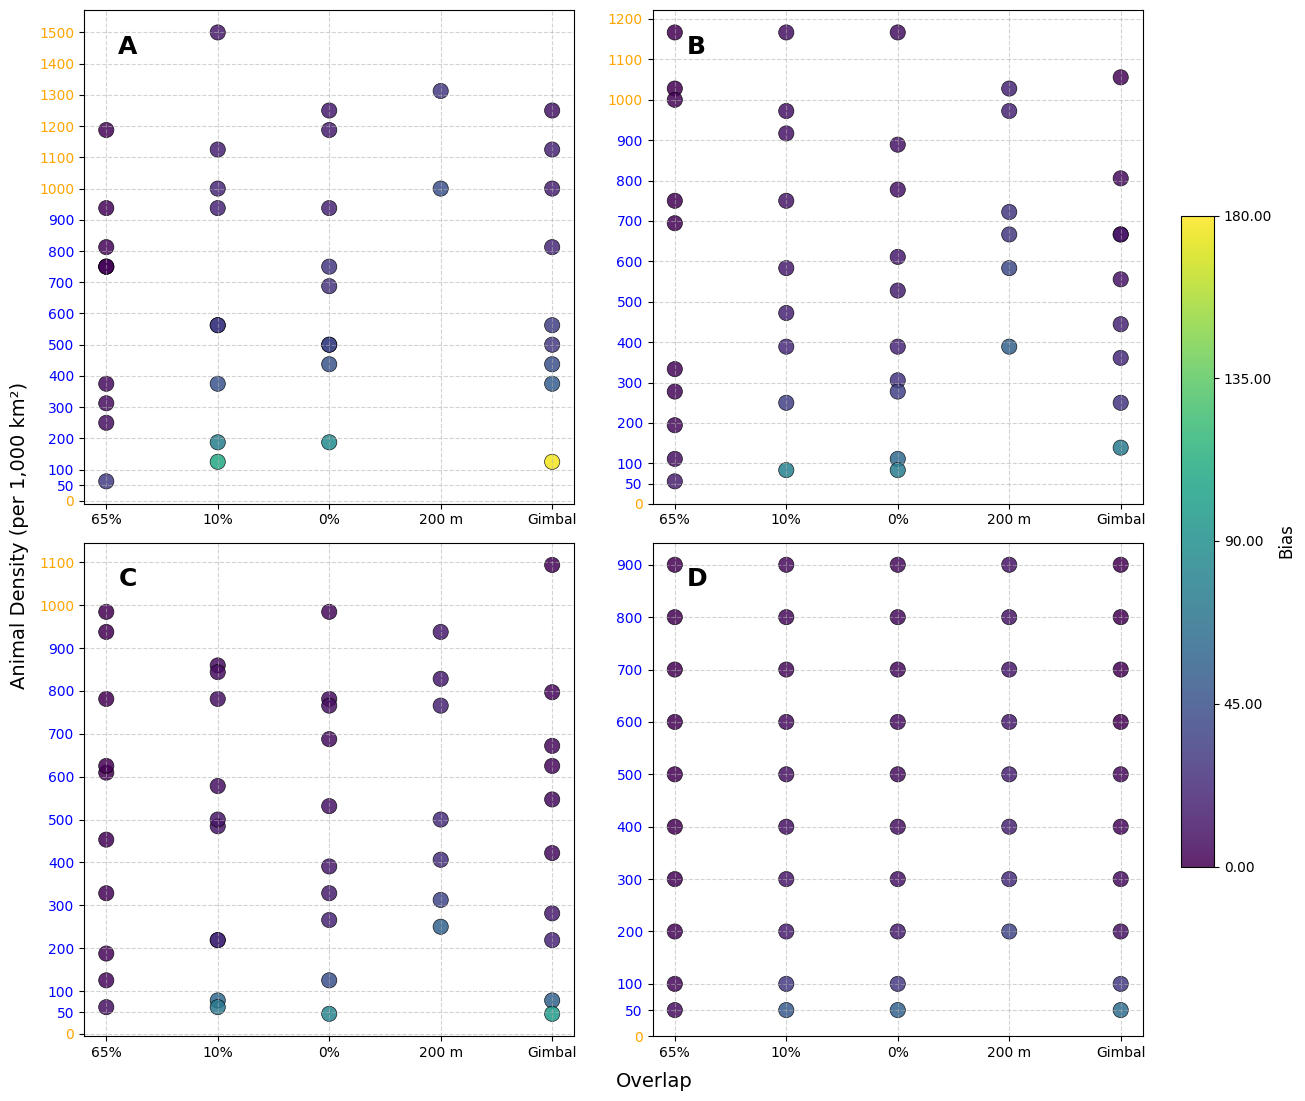

In [ ]:

# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # First 4 for 2x2 layout

# Label mapping for x-axis
label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

# Setup figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Colormap and color normalization
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['Percent_Bias'].max(),-1)  # Use absolute maximum
    # vmax=175
)


subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    # Sort subset by density to ensure consistent jittering
    subset = subset.sort_values('Percent_Bias')

    sc = ax.scatter(
        subset['Overlap_cat'],  # Add jitter to x-positions
        subset['trueDensity'],
        c=abs(subset['Percent_Bias']),
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5
    )

    ax.grid(True, linestyle='--', alpha=0.55)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])
  

    # Adjust y-axis ticks
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(0, int(y_max) + 1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Define specific ticks for the colorbar (linearly spaced)
max_val = round(sorted_data['Percent_Bias'].max(),-1)
cbar_ticks = np.linspace(0, max_val, 5)  # Create 5 evenly spaced ticks from 0 to max

# Shared colorbar for RRMSE
cbar = fig.colorbar(sc, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Bias', fontsize=12)  # Removed log scale notation
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_yticklabels([f'{x:.2f}' for x in cbar_ticks])  # Format with 2 decimal places


plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_Bias_combined.png'), dpi=300)
plt.show()

/tmp/ipykernel_539/2000723084.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])


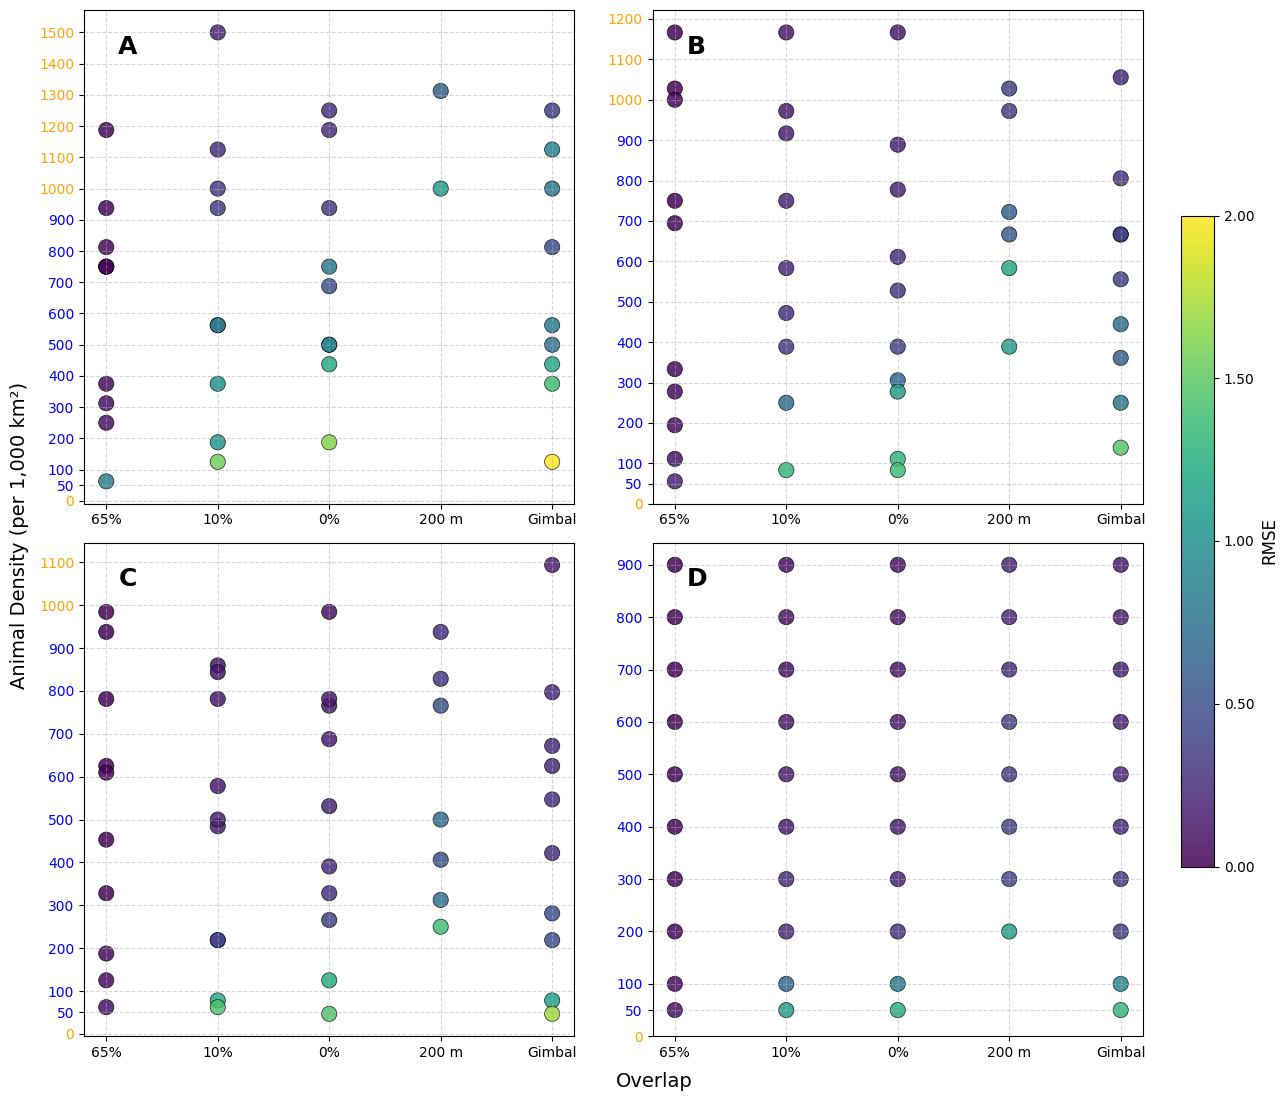

In [23]:
# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # First 4 for 2x2 layout

# Label mapping for x-axis
label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

# Setup figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Colormap and color normalization
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['RRMSE'].max(),0)
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('RRMSE')

    sc = ax.scatter(
        subset['Overlap_cat'],
        subset['trueDensity'],
        c=subset['RRMSE'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5
    )

    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Adjust y-axis ticks
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(0, int(y_max) + 1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Define specific ticks for the colorbar (linearly spaced)
max_val = round(sorted_data['RRMSE'].max(),0) 
cbar_ticks = np.linspace(0, max_val, 5)  # Create 5 evenly spaced ticks from 0 to max

# Shared colorbar for RRMSE
cbar = fig.colorbar(sc, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('RMSE', fontsize=12)  # Removed log scale notation
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_yticklabels([f'{x:.2f}' for x in cbar_ticks])  # Format with 2 decimal places

plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_Bias_combined.png'), dpi=300)
plt.show()

/tmp/ipykernel_7292/782253735.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])


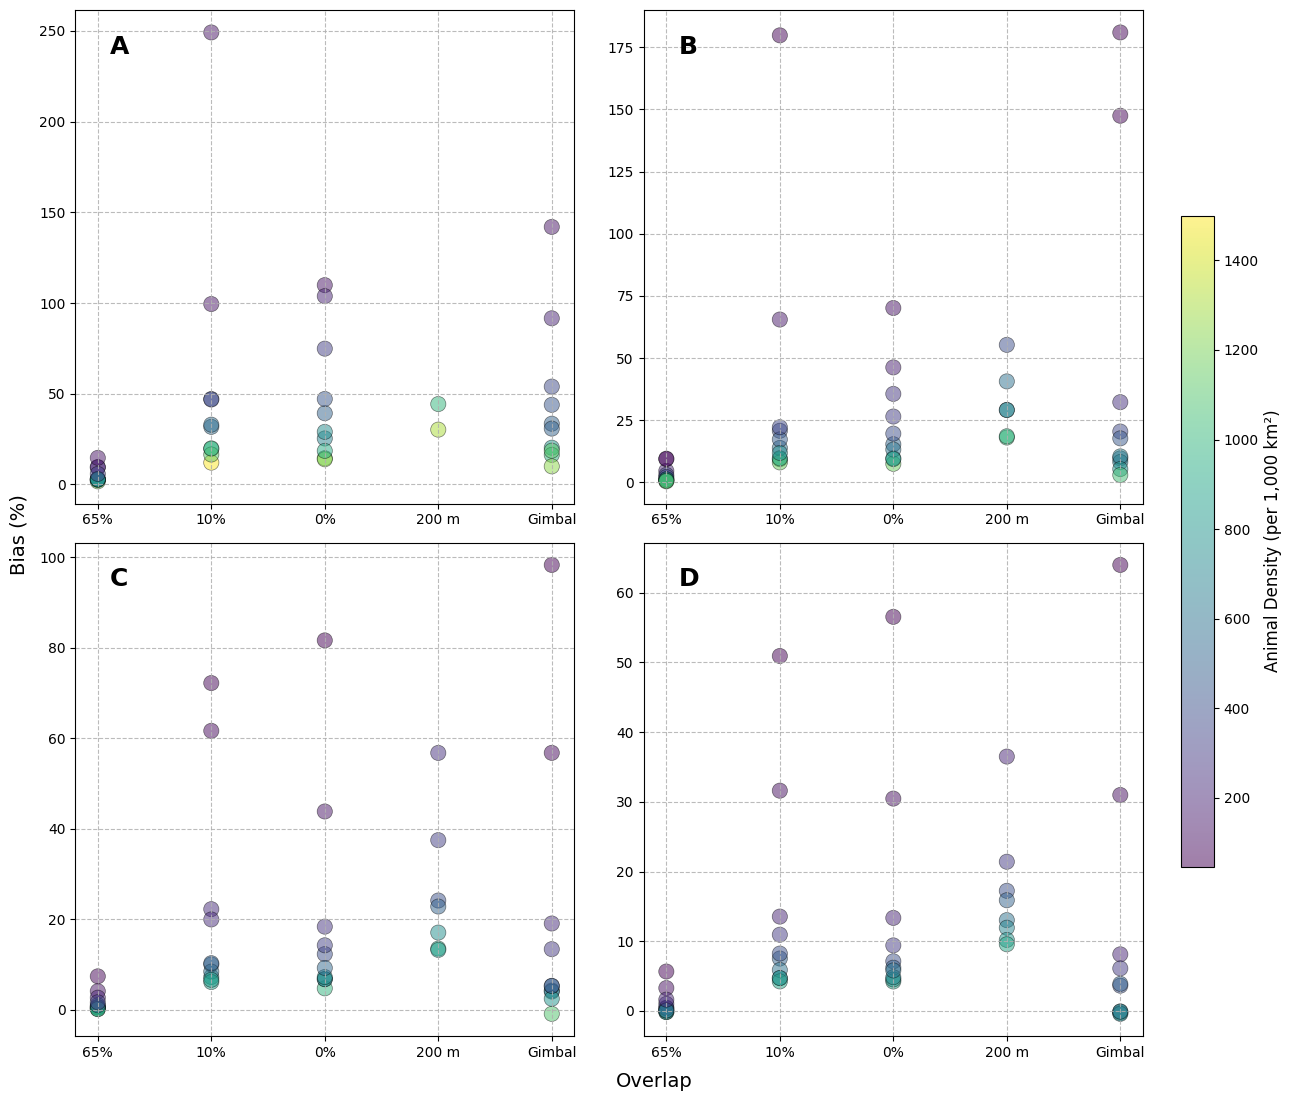

In [24]:
# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # First 4 for 2x2 layout

# Label mapping for x-axis
label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

# Setup figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Colormap and color normalization
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=sorted_data['trueDensity'].min(),
    vmax=sorted_data['trueDensity'].max()
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]

    sc = ax.scatter(
        subset['Overlap_cat'],
        subset['Percent_Bias'],  # Swapped to y-axis
        c=subset['trueDensity'], # Now colors show density
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.5,
        edgecolor='k',
        linewidth=0.5
    )

    ax.grid(True, linestyle='--', alpha=0.85)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Add subplot label
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Bias (%)', va='center', rotation='vertical', fontsize=14)

# Shared colorbar for Animal Density
cbar = fig.colorbar(sc, ax=axs, orientation='vertical', pad=0.1, fraction=0.03)
cbar.set_label('Animal Density (per 1,000 km²)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_density_bias.png'), dpi=300)
plt.show()

In [3]:
coverData

,Simulation,Design,Mean_Sampler_Count,Mean_Cover_Area,Mean_Cover_Percentage,Mean_Line_Length,Mean_Trackline_Length,Mean_Cyclic_Trackline_Length,Mean_On_Effort,Mean_Off_Effort,Mean_Return_to_Home,Mean_Off_Effort_Return,On_Effort_Percentage,Off_Effort_Percentage,Return_to_Home_Percentage,Off_Effort_Return_Percentage,Number_of_Plots,Overlap
0,gimbal4,systematic,25.8,1.536371e+07,15.36,51500.0,58242.50,67190.71,51500.0,6742.50,8948.21,15690.71,76.65,10.03,13.32,23.35,4,gimbal
1,gimbal9,systematic,58.2,3.464464e+07,34.64,116420.0,131675.10,151625.91,116420.0,15255.10,19950.81,35205.91,76.78,10.06,13.16,23.22,9,gimbal
2,gimbal16,systematic,103.6,6.162002e+07,61.62,207140.0,234286.70,269697.47,207140.0,27146.70,35410.77,62557.47,76.80,10.07,13.13,23.20,16,gimbal
3,gimba25,systematic,161.8,9.626249e+07,96.26,323560.0,365961.80,421323.38,323560.0,42401.80,55361.58,97763.38,76.80,10.06,13.14,23.20,25,gimbal
4,2004,systematic,40.0,6.337555e+06,6.34,80000.0,87200.00,97962.90,80000.0,7200.00,10762.90,17962.90,81.66,7.35,10.99,18.34,4,200
5,2009,systematic,90.0,1.427240e+07,14.27,180000.0,196200.00,220416.52,180000.0,16200.00,24216.52,40416.52,81.66,7.35,10.99,18.34,9,200
6,20016,systematic,160.0,2.534513e+07,25.35,320000.0,348800.00,391851.60,320000.0,28800.00,43051.60,71851.60,81.66,7.35,10.99,18.34,16,200
7,20025,systematic,250.0,3.959066e+07,39.59,500000.0,545000.00,612268.12,500000.0,45000.00,67268.12,112268.12,81.66,7.35,10.99,18.34,25,200
8,04,systematic,100.0,1.583635e+07,15.84,200000.0,207680.00,215360.00,200000.0,7680.00,7680.00,15360.00,92.87,3.57,3.57,7.13,4,0
9,09,systematic,225.0,3.564378e+07,35.64,450000.0,467280.00,484560.00,450000.0,17280.00,17280.00,34560.00,92.87,3.57,3.57,7.13,9,0


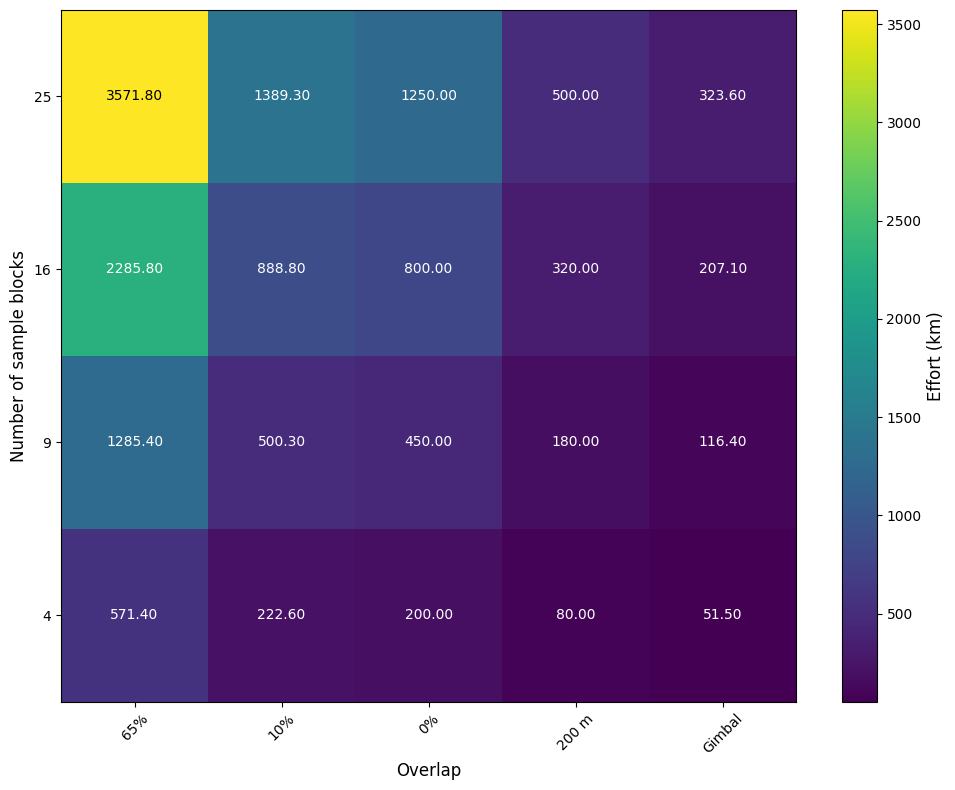

In [42]:
# Create pivot table with CV values divided by 1000
pivot_table = coverData.pivot_table(
    values='Mean_On_Effort',
    index='Number_of_Plots',
    columns='Overlap',
    aggfunc='mean'
) / 1000 # convert effort to KM

# Sort index in descending order to reverse y-axis
pivot_table = pivot_table.sort_index(ascending=False)

# Reorder columns (manually set order)
desired_order = ['65', '10', '0', '200', 'gimbal']
pivot_table = pivot_table[desired_order]

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap with viridis colormap
im = ax.imshow(pivot_table, cmap='viridis', aspect='auto')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Effort (km)', fontsize=12)

# Configure axes with custom labels
ax.set_xticks(np.arange(len(desired_order)))
ax.set_yticks(np.arange(len(pivot_table.index)))

# Create custom x-labels
x_labels = ['65%', '10%', '0%', '200 m', 'Gimbal']
ax.set_xticklabels(x_labels)
ax.set_yticklabels(pivot_table.index)

# Label axes
plt.xlabel('Overlap', fontsize=12)
plt.ylabel('Number of sample blocks', fontsize=12)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Function to determine text color based on background brightness
def get_text_color(val, vmin, vmax):
    # Calculate relative brightness (0-1)
    brightness = (val - vmin) / (vmax - vmin)
    # Return black for bright backgrounds, white for dark backgrounds
    return 'black' if brightness > 0.7 else 'white'

# Add text annotations in each cell with dynamic color
vmin = pivot_table.min().min()
vmax = pivot_table.max().max()

# Add text annotations in each cell
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = round(pivot_table.iloc[i, j], 1)
        text_color = get_text_color(value, vmin, vmax)
        text = ax.text(j, i, f'{value:.2f}',
                      ha='center', va='center',
                      color=text_color)

plt.tight_layout()
# plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_heatmap.png'), dpi=300)
plt.show()